In [1]:
# Import all dependencies.
# This project is done by Python 2.7
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, ShuffleSplit, learning_curve
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
import matplotlib.gridspec as gridspec
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from time import time
import numpy as np
import itertools
from sklearn.svm import SVC, LinearSVC
# Inline graph demonstration.
%matplotlib inline

In [2]:
data = pd.read_csv("/Users/Aaron/Desktop/STA141C/Final Project/creditcard.csv")

<p><h1><font face="arial">Introduction</font></h1></p>
<p><font size="3.5", face="arial">Credit card fraud is a wide-ranging term for theft and fraud committed using or involving a payment card, such as a credit card or debit card, as a fraudulent source of funds in a transaction. The purpose may be to obtain goods without paying, or to obtain unauthorized funds from an account.</font></p>
<p><font size="3.5", face="arial">Although incidence of credit card fraud is limited to about 0.1% of all card transactions, this has resulted in huge financial losses as the fraudulent transactions have been large value transactions. Also, 0.04% (4 out of every 10,000) of all monthly active accounts were fraudulent. Even with tremendous volume and value increase in credit card transactions, these proportions have stayed the same or have decreased due to sophisticated fraud detection and prevention systems. Today's fraud detection systems are designed to prevent one twelfth of one percent of all transactions processed, which still translates into billions of dollars in losses.</font></p>
<p><font size="3.5", face="arial">An effective fraud detection system can make huge impact and potentially prevent the card holder from suffering unnecessary losses. Our goal is to study machine learning techniques and apply a subset of those techniques to detect fraudulent transactions. Throughout the project, we have studied and employed logistic regression, SVM (support vector machine), random forest, and ensemble. For each method, we have tried different parameters and compared the corresponding results to select the best combination of parameters. In particular, though, ensemble itself is not a machine learning method, but rather it refers to combine multiple models and produce predictions according to the majority results given by the models. Ensemble is a good way to reduce variance, average out biases and is less likely to overfit.</font></p>
<p><h1><font face="arial">Overview</font></h1></p>
<p><font size="3.5", face="arial">The dataset is adapted from a Kaggle competition. This dataset consists of 28 independent variables resulting from a PCA transformation, plus another two independent variables: time and amount. Most of the variables are numeric, of which names are unknown out of confidential consideration. Each row of this dataset is a transaction. The response variable is class taking numeric value 0 or 1. 0 means this transaction is labeled as normal, while 1 means this transaction is labeled as fraudulent. There are 284,807 transactions in the dataset, and 492 are frauds, which accounts for only 0.172% of all transactions. It should be noticed that this dataset is extremely imbalanced, and thus certain resampling schemes are to be considered to deal with the skewness.</font></p>
<p><font size="3.5", face="arial">We split the project into two parts: exploratory data analysis (EDA) and modeling. In EDA, we mainly explore the dataset to get a preliminary understanding of the dataset, which serves as a guideline for the subsequent resampling and modeling. Specifically, we will check the existence of missing values, obtain summary statistics of the dataset, plot the distributions of a subset of independent variables</font></p>

<font size="6"><i><strong>Exploratory Data Analysis</strong></i></font>

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Display summary statistics of the dataset.
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
print "The summary statistics of normal transactions:"
data.Amount[data.Class == 0].describe()

The summary statistics of normal transactions:


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [6]:
print "The summary statistics of fraudulent transactions:"
data.Amount[data.Class == 1].describe()

The summary statistics of fraudulent transactions:


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
# Check the existence of missing values.
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<font size="4">There are no missing values in this dataset.</font>

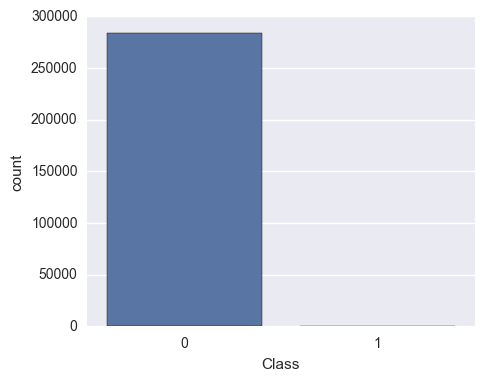

In [8]:
# Visualize the count for normal transactions and fraudulent transactions.

plt.figure(figsize = (5, 4), dpi = 100)
sns.countplot(data["Class"])

In [9]:
print len(data[data["Class"] == 0])
print len(data[data["Class"] == 1])
print len(data[data["Class"] == 0]) / len(data)
print len(data[data["Class"] == 1]) / len(data)

284315
492
0.998272514369
0.00172748563062


<font size="4">There are 284807 transactions in the dataset. Among all transactions, there are 284315 normal transactions, but there are only 492 fraudulent transactions. Normal transactions account for 99.83% of total transactions, while fraudulent transactions account for 0.1727% of total transactions. This dataset is extremely imbalanced. Given this situation, a resampling scheme (undersampling or oversampling, or a combination of both) is to be performed before statistical analysis.</font>

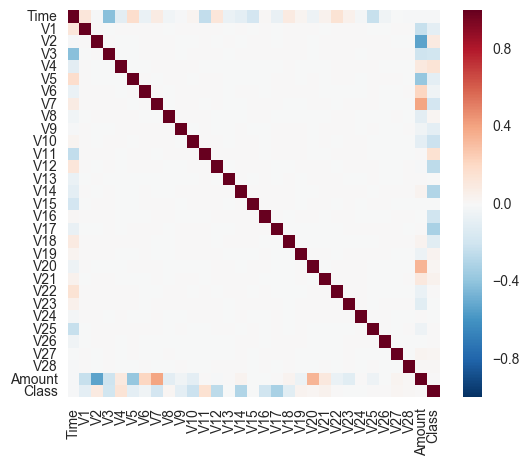

In [10]:
# Plot a heatmap to display the correlation between variables.

plt.figure(figsize = (6, 5), dpi = 100)
sns.heatmap(data.corr(method = "pearson"))

<font size="4">The diagonal entries represent the correlation against the variable itself. We can observe from off-diagonal entries that variables are pretty uncorrelated. This is bacause variables V1-V28 are obtained from PCA transformation.</font>

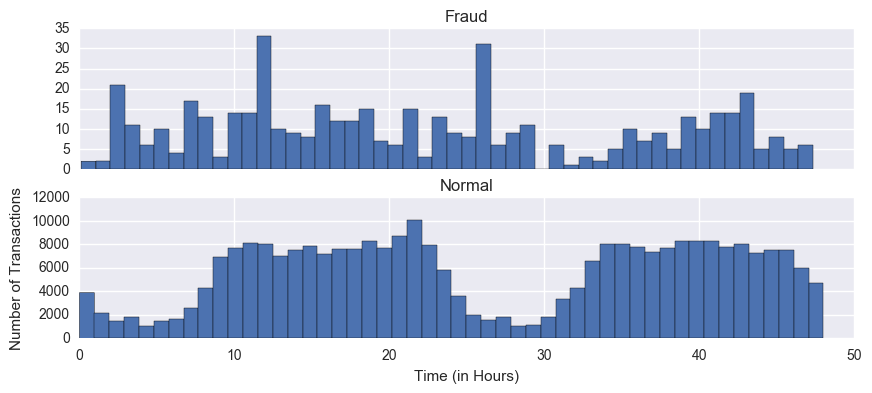

In [11]:
# Plot the number of transactions against time. 

f, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize = (10, 4), dpi = 100)

bins = 50

ax1.hist(data.Time[data.Class == 1] / 3600, bins = bins)
ax1.set_title("Fraud")

ax2.hist(data.Time[data.Class == 0] / 3600, bins = bins)
ax2.set_title("Normal")

plt.xlabel("Time (in Hours)")
plt.ylabel("Number of Transactions")

<font size="4">It seems that there is no apparent pattern between fraudulent transactions and time, but there seems to be a cyclical pattern between normal transactions and time.</font>

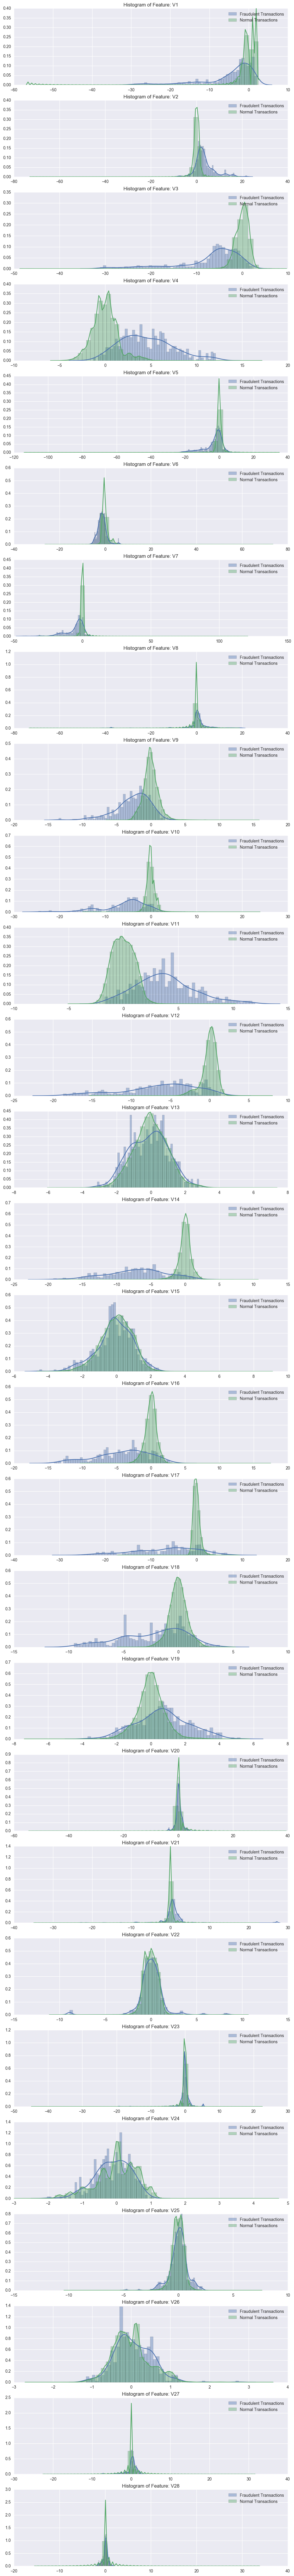

In [7]:
# Plot the distribution of variables for normal transactions and fraudulent transactions, respectively.

v_features = data.iloc[:, 1:-2].columns

plt.figure(figsize = (12, 28*4), dpi = 100)
gs = gridspec.GridSpec(28, 1)
for i, feature in enumerate(data[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[feature][data.Class == 1], bins = 50, label ="Fraudulent Transactions")
    sns.distplot(data[feature][data.Class == 0], bins = 50, label ="Normal Transactions")
    ax.set_xlabel("")
    ax.set_title("Histogram of Feature: "+str(feature))
    plt.legend()

# Sample

### Undersampling

In [3]:
# define features and classes
feature_name = list(data.columns[0:-1])
class_name = data.columns[-1]

np.random.seed(0)
# create a function to get downsampling data
def under_sampling(creditcard):
    sample_size = sum(creditcard.Class == 1)
    fraud_indices = creditcard[creditcard.Class == 1].index
    normal_indices =  creditcard[creditcard.Class == 0].index
    random_indices = np.random.choice(normal_indices, sample_size, replace=False) 
    merged_sample = np.concatenate([fraud_indices, random_indices])
    sample = creditcard.iloc[merged_sample]
    
    return sample

# Under sampling
under_sampled = under_sampling(data)
X = under_sampled[feature_name].as_matrix()
y = under_sampled[class_name].as_matrix()

X_untrain, X_untest, y_untrain, y_untest = train_test_split(X, y, test_size = 0.3)

### Smote Sampling

In [24]:
# SMOTE Sampling
X = data[feature_name].as_matrix()
y = data[class_name].as_matrix()
X_resampled, y_resampled= SMOTE(random_state = 44).fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3)

# Model

## Logistic Classification

In [51]:
def plot_confusion_matrix(cm, classes, normalize = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize = True.
    Code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.figure(dpi = 100)
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float")/cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<p><font size="3.5", face="arial">Our dataset is extremely imbalanced, so we first perform resampling. Here, we use SMOTE (Synthetic Minority Over-sampling Technique), which is basically copying samples of minority classes.</font></p>

Confusion matrix, without normalization
[[142   3]
 [ 15 136]]


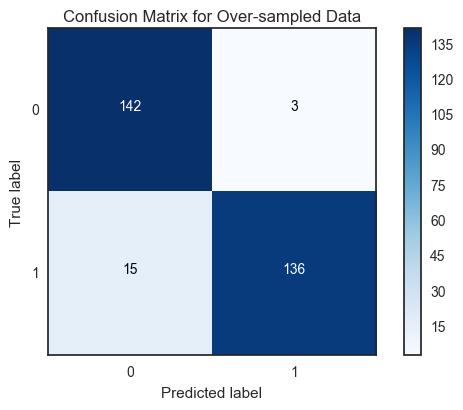

In [56]:
# start_time = time()
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3)
logit = LogisticRegression()
logit.fit(X_untrain, y_untrain)
logit_prediction = logit.predict(X_untest)

with plt.style.context(("seaborn-white")):
    plot_confusion_matrix(confusion_matrix(y_untest, logit_prediction), classes = [0, 1], 
                          title = "Confusion Matrix for Over-sampled Data")


## SVM

### 'rbf' kernel

In [53]:
SVM_rbf = SVC(C = 1.0, kernel = 'rbf', gamma = 'auto', random_state = 0)
predict_rbf = clf_rbf.fit(X_untrain, y_untrain).predict(X_untest)
rbf_acc = accuracy_score(y_untest.ravel(), predict_rbf)
print 'After fitting the SVM with rbf kernel by default parameters, the accuracy is {}'.format(rbf_acc)

After fitting the SVM with rbf kernel by default parameters, the accuracy is 0.527027027027


### 'linear' kernel

In [54]:
SVM_lin = SVC(C = 1.0, kernel = 'linear', gamma = 'auto', random_state = 0)
predict_lin = clf_lin.fit(X_untrain, y_untrain).predict(X_untest)
lin_acc = accuracy_score(y_untest.ravel(), predict_lin)
print 'After fitting the SVM with linear kernel by default parameters, the accuracy is {}'.format(lin_acc)

After fitting the SVM with linear kernel by default parameters, the accuracy is 0.925675675676


### LinearSVC

In [61]:
linsvc = LinearSVC(C = 1 ,dual=False, random_state = 0)
predict_test = linsvc.fit(X_untrain, y_untrain).predict(X_untest)
linsvc_acc = accuracy_score(y_untest.ravel(), predict_test)
print 'After fitting the LinearSVC by default parameters, the accuracy is {}'.format(linsvc_acc)

After fitting the LinearSVC by default parameters, the accuracy is 0.929054054054


<p><font size="3.5", face="arial">By observing the results above, we can obviously see that the accuracy of applying linear kernel (0.92567567567567566) is greater than the accuracy of using rbf kernel (0.52702702702702697). Also, the LinearSVC would take less time to calculate the accuracy of the testing set and return the higher accuracy compared with SVC. Thus, we will apply LinearSVC instead of SVC with linear kernel. </font></p>

### Tuning parameters for Models

In [44]:
def tuning_params(data_X, data_y, estimator, rbf_SVM = False):
    C_range = np.logspace(-3,3,7)  # ridge penalty parameter
    # A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly 
    # by giving the model freedom to select more samples as support vectors
    cv = KFold(n_splits=5, random_state = 5) # 5-fold cross validation
    
    if rbf_SVM == True:
        gamma_range = np.logspace(-3,3,7) # the inverse of the radius of influence of samples selected by the model 
                                                # as support vectors
        param_grid = dict(gamma=gamma_range, C=C_range)
        grid = GridSearchCV(estimator, param_grid=param_grid, cv=cv)
        grid.fit(data_X, data_y)

        print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
        return grid.best_estimator_.C, grid.best_estimator_.gamma
    else:
        param_grid = dict(C=C_range)
        grid = GridSearchCV(estimator, param_grid=param_grid, cv=cv)
        grid.fit(X, y)
        
        print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
        return grid.best_estimator_.C

#### Tuning for rbf

In [45]:
# get the parameters
a = SVC(kernel='rbf')
best_c, best_gamma = tuning_params(X_untrain, y_untrain, a, rbf_SVM = True )

The best parameters are {'C': 10.0, 'gamma': 0.001} with a score of 0.62


In [25]:
# fit the models with best parameters
SVM_rbf = SVC(C = best_c, gamma = best_gamma, kernel = 'rbf')
rbf_fit = SVM_rbf.fit(X_untrain, y_untrain)
rbf_fit

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
predict = rbf_fit.predict(X_untest)
print 'After tnning parameters, the accuracy of SVC with rbf kernel is {}'.format(accuracy_score(y_untest, predict))

After tnning parameters, the accuracy of SVC with rbf kernel is 0.587837837838


#### Tuning for LinearSVC

In [68]:
linsvc = LinearSVC(dual = False)
best_c = tuning_params(X_untrain, y_untrain, linsvc)

The best parameters are {'C': 0.10000000000000001} with a score of 0.93


In [69]:
linsvc = LinearSVC(C = best_c, dual = False)
lin_fit = linsvc.fit(X_untrain, y_untrain)
lin_fit

LinearSVC(C=0.10000000000000001, class_weight=None, dual=False,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

In [70]:
predict = lin_fit.predict(X_untest)
print 'After tuning parameters, the accuracy of LinearSVC is {}'.format(accuracy_score(y_untest, predict))

After tuning parameters, the accuracy of LinearSVC is 0.929054054054


Confusion matrix, without normalization
[[142   3]
 [ 18 133]]


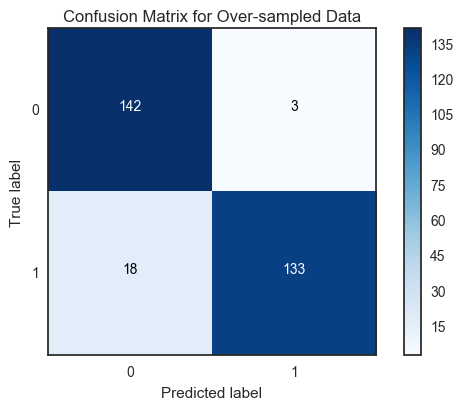

In [71]:
with plt.style.context(("seaborn-white")):
    plot_confusion_matrix(confusion_matrix(y_untest, predict), classes = [0, 1], 
                          title = "Confusion Matrix for Over-sampled Data")

## RandomForestClassifier

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [136]:
ranfo_clf = RandomForestClassifier(n_estimators=100)
fit = ranfo_clf.fit(X_untrain, y_untrain)

predictions=fit.predict(X_untest)

accuracy_score(y_untest.ravel(), predictions)

0.93581081081081086

In [137]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X_untrain,y_untrain)

print model.feature_importances_

[ 0.00679858  0.01585928  0.01204509  0.05439678  0.15714534  0.00709505
  0.06061716  0.0231897   0.00689386  0.03057736  0.05042842  0.05101544
  0.08148682  0.01014854  0.13535708  0.00779453  0.05027048  0.10868165
  0.01439368  0.01171502  0.01279095  0.01120547  0.00784722  0.0136064
  0.01034927  0.00653336  0.00890716  0.01662497  0.00709308  0.00913225]


In [138]:
trees=range(10, 100)
accuracy=np.zeros(90)

for idx in range(len(trees)):
    classifier = RandomForestClassifier(n_estimators=idx + 1)
    classifier=classifier.fit(X_untrain,y_untrain)
    predictions=classifier.predict(X_untest)
    accuracy[idx]=accuracy_score(y_untest, predictions)

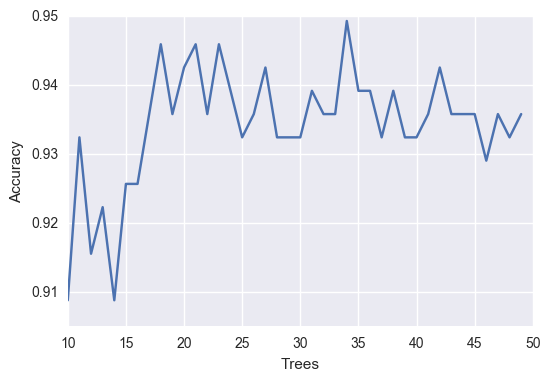

In [132]:
plt.cla()
plt.xlabel('Trees')
plt.ylabel('Accuracy')
plt.plot(trees, accuracy)